### RNN-Based Text Generation

#### Objectives
Implement a simple RNN for text generation to deepend your understanding of how recurrent neural networks can be used to model sequences and generate text based on learned patterns.

### 1. RNN Model Implementation (10 Points)
- Implement a basic Recurrent Neural Network model from scratch using PyTorch or TensorFlow. Your model should include an embedding layer, at least one RNN layer, and a fully connected layer for output. Refer to the **Recurrent Neural Networks (RNN)** section of the lectures for guidance on the architecture.
- Use the **Long Short-Term Memory RNNs (LSTMs)** section as a reference to enhance your model with LSTM cells to improve its ability to capture long-term dependencies in text.

# ----------------------------------------------------------------------------------
### This part is for sketching the raw structures of the models for practice.

1. Import libraries

In [1]:
# For the consistency of versions
!pip install torch==2.0.0 torchtext

import torch
import torch.nn as nn
import torch.optim as optim
import random
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset

INFO: pip is looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.1 M

2. Define a basic RNN model

In [ ]:
"""
class RNNCell(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(RNNCell, self).__init__()
    # Weight matrix for input-to-hidden transformation
    # Transform the input x_t at timestep t into the hidden state space
    self.Wxh = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)

    # Weight matrix for hidden-to-hidden transformation
    # Transform the previous hidden state h_(t-1)
    # into the current hidden state space
    self.Whh = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)

    # Bias term for the hidden state
    # Add a learnable bias to the hidden state
    self.bh = nn.Parameter(torch.zeros(hidden_size))

  # h_t = tanh(Wxh * x_t + Whh * h_(t-1) + bh)
  def forward(self, x, h_prev):
    h_next = torch.tanh(x @ self.Wxh.t() + h_prev @ self.Whh.t() + self.bh)
    # h_next = self.dropout(h_next)
    return h_next
"""

In [ ]:
"""
class BasicRNN(nn.Module):
  def __init__(self, vocab_size, embed_size,
               hidden_size, output_size, dropout = 0.5):
    super(BasicRNN, self).__init__()
    # Embedding layer
    self.embedding = nn.Embedding(vocab_size, embed_size)
    # RNN Cell
    self.rnn_cell = RNNCell(embed_size, hidden_size)
    # Fully connected layer
    self.fc = nn.Linear(hidden_size, output_size)
    # Dropout
    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    batch_size, seq_len = x.size()

    # Initialize hidden state
    # .to(x.device) ensures tensors are on the same device
    h = torch.zeros(batch_size, self.rnn_cell.Wxh.size(0)).to(x.device)

    # Store all output predictions
    outputs = []

    # Process each timestep
    for t in range(seq_len):
      # Embed input at timestep t
      x_t = self.embedding(x[:, t])
      # Update hidden state
      h = self.rnn_cell(x_t, h)
      # Collect predictions for each timestep
      outputs.append(self.fc(self.dropout(h)))

    # Stack outputs along the sequence dimension
    outputs = torch.stack(outputs, dim = 1)

    # Return outputs for all timesteps
    return outputs
"""

3. Define a basic LSTM model

In [ ]:
"""
class LSTMCell(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(LSTMCell, self).__init__()

    # Input Gate
    # Weight matrix for input-to-input-gate transformation
    self.Wxi = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)
    # Weight matrix for the hidden-to-input-gate transformation
    self.Whi = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)
    # Bias term for the input gate
    self.bi = nn.Parameter(torch.zeros(hidden_size))


    # Forget Gate
    # Weight matrix for input-to-forget-gate transformation
    self.Wxf = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)
    # Weight matrix for hidden-to-forget-gate transformation
    self.Whf = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)
    # Bias term for the forget gate
    self.bf = nn.Parameter(torch.zeros(hidden_size))

    # Cell Gate
    # Weight matrix for input-to-cell-gate transformation
    self.Wxc = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)
    # Weight matrix for hidden-to-cell-gate transformation
    self.Whc = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)
    # Bias term for the cell gate
    self.bc = nn.Parameter(torch.zeros(hidden_size))

    # Output Gate
    # Weight matrix for input-to-output-gate transformation
    self.Wxo = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)
    # Weight matrix for hidden-to-output-gate transformation
    self.Who = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)
    # Bias term for the output gate
    self.bo = nn.Parameter(torch.zeros(hidden_size))

  def forward(self, x, h_prev, c_prev):
    # Input Gate
    # i_t = σ(Wxi * x_t + Whi * h_(t-1) + bi)
    # i_t represents the input gate activation at timestep t
    i = torch.sigmoid(x @ self.Wxi.t() + h_prev @ self.Whi.t() + self.bi)

    # Forget Gate
    # f_t = σ(Wxf * x_t + Whf * h_(t-1) + bf)
    # f_t represents the forget gate activation at timestep t
    f = torch.sigmoid(x @ self.Wxf.t() + h_prev @ self.Whf.t() + self.bf)

    # Cell Gate
    # g_t = tanh(Wxc * x_t + Whc * h_(t-1) + bc)
    # g_t represents the candidate cell state at timestep t
    g = torch.tanh(x @ self.Wxc.t() + h_prev @ self.Whc.t() + self.bc)

    # Output Gate
    # o_t = σ(Wxo * x_t + Who * h_(t-1) + bo)
    o = torch.sigmoid(x @ self.Wxo.t() + h_prev @ self.Who.t() + self.bo)

    # Forward Pass:

    # Update cell state
    # c_t = f_t * c_(t-1) + i_t * g_t
    c_next = f * c_prev + i * g

    # Update hidden state
    # h_t = o_t * tanh(c_t)
    h_next = o * torch.tanh(c_next)

    return h_next, c_next
"""

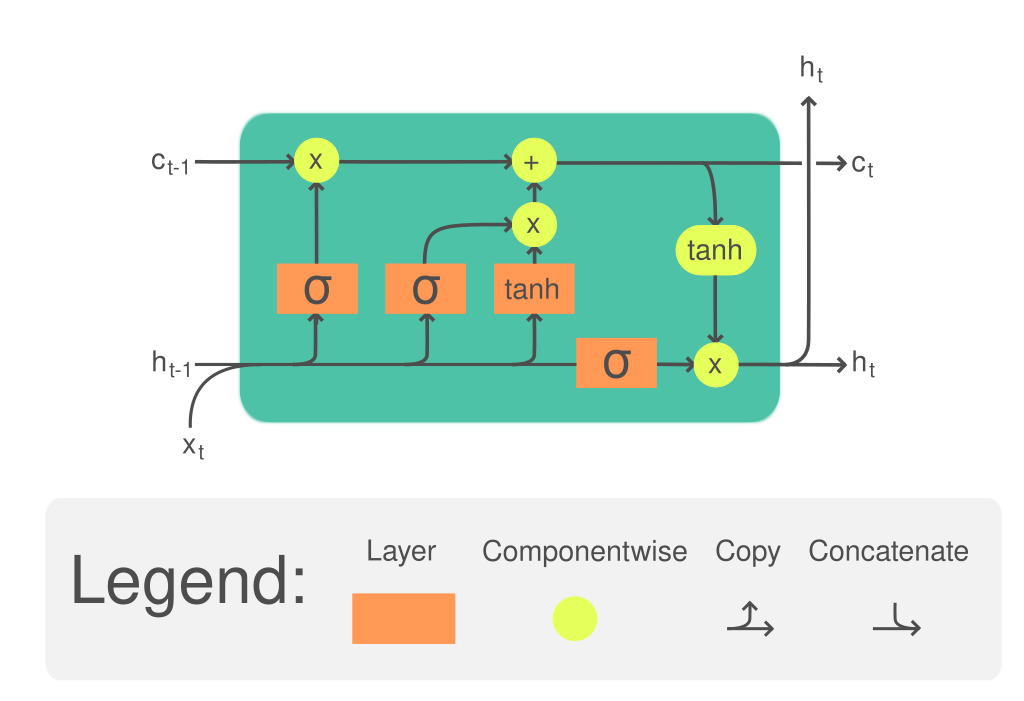

```
 /-- Wxi----->---- + bi = Input Gate (i_t)-----<----Whi----<---\
 |                                                             |
 |      /--Wxf-- + bf = Forget Gate (f_t)-----<-----Whf--<--|  |
 |      |       c_t--<--c_(t-1) * f_t + i_t * g_t           |  |
Input (x_t)      |                          Hidden state (h_(t-1))
 |      |       tanh(c_t) * o_t---->----h_t                 |  |
        \--Wxc-- + bc = Candidate Cell State (g_t)--Whc--<--|  |
 |                                                             |
 \--Wxo------>---- + bo = Output Gate (o_t)----<----Who----<---/
```

In [ ]:
"""
class LSTMRNN(nn.Module):
  def __init__(self, vocab_size, embed_size,
               hidden_size, output_size, dropout = 0.5):
    super(LSTMRNN, self).__init__()
    # Embeding layer
    self.embedding = nn.Embedding(vocab_size, embed_size)
    # LSTM Cell
    self.lstm_cell = LSTMCell(embed_size, hidden_size)
    # Fully connected layer
    self.fc = nn.Linear(hidden_size, output_size)
    # Dropout
    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    batch_size, seq_len = x.size()
    # Initialize hidden state
    h = torch.zeros(batch_size, self.lstm_cell.Wxi.size(0)).to(x.device)
    # Initialize cell state
    c = torch.zeros(batch_size, self.lstm_cell.Wxi.size(0)).to(x.device)

    # Process each timestep
    outputs = []

    # Process each timestep
    for t in range(seq_len):
      # Embed input at timestep t
      x_t = self.embedding(x[:, t])
      # Update hidden and cell states
      h, c = self.lstm_cell(x_t, h, c)
      # Collect predictions for each timestep
      outputs.append(self.fc(self.dropout(h)))

    # Stack outputs along the sequence dimension
    outputs = torch.stack(outputs, dim = 1)

    return outputs
"""

### This is the end of the manual model sketching practice.
# ----------------------------------------------------------------------------------

### Basic RNN

In [ ]:
class BasicRNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim,
               output_dim, n_layers, dropout = 0.5):
    """
    vocab_size: size of the vocabulary
    embedding_dim: dimension of word embeddings
    hidden_dim: dimension of the hidden state
    output_dim: dimension of the output
    n_layer: number of RNN layers
    dropout: dropout probability
    """
    super(BasicRNN, self).__init__()

    # Embedding Layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    # Basic RNN Layer
    self.rnn = nn.RNN(
        input_size = embedding_dim,
        hidden_size = hidden_dim,
        num_layers = n_layers,
        batch_first = True,
        dropout = dropout if n_layers > 1 else 0
    )

    # Fully Connected Layer
    self.fc = nn.Linear(hidden_dim, output_dim)

    # Dropout
    self.dropout = nn.Dropout(dropout)

    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

  def forward(self, text, hidden = None):
    """
    Forward pass for Basic RNN

    text (Tensor): Input tensor of shape (batch_size, seq_length)
    hidden (Tensor): Initial hidden state

    Return:
    - Tensor: Output predictions
    - Tensor: Updated hidden state
    """

    # Embed input:
    embedded = self.dropout(self.embedding(text))

    # Initialize hidden state if not provided
    if hidden is None:
      batch_size = text.size(0)
      hidden = torch.zeros(self.n_layers,
                           batch_size,
                           self.hidden_dim).to(text.device)

    # RNN forward pass
    output, hidden = self.rnn(embedded, hidden)

    output = self.fc(self.dropout(output))

    return output, hidden

### LSTM

In [ ]:
class LSTMRNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim,
               output_dim, n_layers, dropout = 0.5):
    """
    LSTM CLassifier

    vocab_size: size of the vocabulary
    embedding_dim: dimension of word embeddings
    hidden_dim: dimension of the hidden state
    output_dim: dimension of the output
    n_layers: number of LSTM layers
    dropout: dropout probability
    """
    super(LSTMRNN, self).__init__()

    # Embedding Layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    # LSTM Layer
    self.lstm = nn.LSTM(
        input_size=embedding_dim,
        hidden_size=hidden_dim,
        num_layers=n_layers,
        batch_first = True,
        dropout=dropout if n_layers > 1 else 0
    )

    # Fully Connected Layer
    self.fc = nn.Linear(hidden_dim, output_dim)

    # Dropout
    self.dropout = nn.Dropout(dropout)

    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

  def forward(self, text, hidden = None):
    """
    Forward pass for LSTM

    text: Input tensor
    hidden: Initial hidden state (tuple, (h_0, c_0))

    Return:
    - Tensor: output prediction
    - Tuple: updated hidden state (h_n, c_n)
    """

    # embed input
    embedded = self.dropout(self.embedding(text))

    # Initialize hidden state if not provided
    if hidden is None:
      batch_size = text.size(0)
      h_0 = torch.zeros(self.n_layers, batch_size,
                        self.hidden_dim).to(text.device)
      c_0 = torch.zeros(self.n_layers, batch_size,
                        self.hidden_dim).to(text.device)
      hidden = (h_0, c_0)

    # LSTM forward pass
    output, hidden = self.lstm(embedded, hidden)

    output= self.fc(self.dropout(output))

    return output, hidden

### 2. Dataset Preparation (10 Points)
- Select a small text dataset to train your model. This could be a collection of poems, song lyrics, or any text you choose. Preprocess the data by tokenizing the text into sequences and converting them into a numerical format suitable for training your RNN.

In [ ]:
# Sample dataset
text_data = [
    "My dolls have been put away like dead children in a chest I will carry with me when I marry."
    "I reach under my skirt to feel a satin slip bought for this day."
    "It is soft as the inside of my thighs."
    "My hair has been nailed back with my mother’s black hairpins to my skull."
    "Her hands stretched my eyes open as she twisted braids into a tight circle at the nape of my neck."
    "I am to wash my own clothes and sheets from this day on, as if the fluids of my body were poison,"
    "as if the little trickle of blood I believe travels from my heart to the world were shameful."
    "Is not the blood of saints and men in battle beautiful?"
    "Do Christ’s hands not bleed into your eyes from His cross?"
    "At night I hear myself growing and wake to find my hands drifting of their own will to soothe skin stretched tight over my bones,"
    "I am wound like the guts of a clock, waiting for each hour to release me."
]

# Tokenize the text
# Use a basic English tokenizer to split text into words
tokenizer = get_tokenizer("basic_english")

# Function to yield tokens from the dataset
def yield_tokens(data):
  for text in data:
    yield tokenizer(text)

# Build vocabulary
# Create a vocabulary from the tokenized text
# specials=["<unk>"] adds a special token for unknown words
vocab = build_vocab_from_iterator(yield_tokens(text_data),
                                  specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Convert text to numerical sequences
# Convert a text string into a list of numerical indices using the vocabulary
def text_to_sequence(text):
  return [vocab[token] for token in tokenizer(text)]

We then prepare the dataset and create dataloader.

In [ ]:
# Prepare dataset
class TextDataset(Dataset):
  def __init__(self, text_data, seq_length = 10):
    """
    Initialize the dataset
    text_data: list of text strings
    seq_length: length of each input sequence
    """
    # Store the sequences and targets
    self.data = []
    self.seq_length = seq_length

    for text in text_data:
      # Convert text to numerical sequence
      tokens = text_to_sequence(text)
      # Create input-target pairs for each sequence
      for i in range(len(tokens) - seq_length):
        """
        Input sequence: tokens[i : i + seq_length]
        Target sequence: tokens[i + 1 : i + seq_length + 1]
        Which is the next word's prediction
        """
        self.data.append((tokens[i : i + seq_length],
                          tokens[i + 1 : i + seq_length + 1]))
  def __len__(self):
    """
    Return the total number of sequences in the dataset
    """
    return len(self.data)

  def __getitem__(self, idx):
    """
    Return the input sequence and target at te given index
    idx: Index of the sequence
    return: Tuple of (input_sequence, target_sequence)
    """
    return torch.tensor(self.data[idx][0]), torch.tensor(self.data[idx][1])

In [ ]:
# Create dataset and dataloader
# Length of each input sequence
seq_length = 10
# Create the dataset
dataset = TextDataset(text_data, seq_length)
# Create a DataLoader for batching and shuffling
dataloader = DataLoader(dataset, batch_size = 2, shuffle= True)

For understanding, here is a sample to show the mechanism of the functions:
- Input:
  - `text_data = ["I see a little man"]`
- Vocabulary:
  - `{"<unk>": 0, "I": 1, "see": 2,
  "a": 3, "little": 4, "man": 5}`
- Input-Target Pairs:
  - `Input: [1,2,3,4] -> Target: [2,3,4,5]`

### 3. Training (10 Points)
- Train your RNN model on the prepared dataset. Aim to optimize the model to predict the next word in a sequence based on the given context. Adjust hyperparameters such as learning rate, number of epochs, and hidden layer dimensions to improve performance.

In [ ]:
import numpy as np

def train_and_evaluate(model, dataloader, epochs, lr, clip = 1.0):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr = lr)

  losses = []
  perplexities = []

  for epoch in range(epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_predictions = 0

    for batch_inputs, batch_targets in dataloader:
      batch_inputs = batch_inputs.to(device)
      batch_targets = batch_targets.to(device)

      optimizer.zero_grad()
      predictions, _ = model(batch_inputs)
      predictions = predictions.view(-1, predictions.size(-1))
      batch_targets = batch_targets.view(-1)

      loss = criterion(predictions, batch_targets)
      loss.backward()

      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

      total_loss += loss.item()
      _, predicted = torch.max(predictions, 1)
      total_correct += (predicted == batch_targets).sum().item()
      total_predictions += batch_targets.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_predictions
    perplexity = np.exp(avg_loss)

    losses.append(avg_loss)
    perplexities.append(perplexity)

    if (epoch + 1) % 10 == 0 or epoch == 0:
      print(f"Epoch: {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Acc: {accuracy:.4f}, Perplexity: {perplexity:.2f}")
    if avg_loss == min(losses):
      torch.save(model.state_dict(), f'best_{model.__class__.__name__}.pt')

  return losses, perplexities

In [ ]:
seq_length = 10
batch_size = 4
epochs = 100
clip = 1.0
embedding_dim = 100
hidden_dim = 128
n_layers = 2
dropout = 0.3
lr = 0.001

dataset = TextDataset(text_data, seq_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
rnn_model = BasicRNN(vocab_size=len(vocab), embedding_dim=embedding_dim,
                     hidden_dim=hidden_dim, output_dim=len(vocab),
                     n_layers=n_layers, dropout= dropout)
print(f"\nTraining Basic RNN: ")
rnn_loss, rnn_perplexities = train_and_evaluate(rnn_model, dataloader,
                                                epochs, lr, clip)


Training Basic RNN: 


<ipython-input-37-504e8200b5ee>:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Epoch: 1/100, Loss: 4.2536, Acc: 0.1770, Perplexity: 70.36
Epoch: 10/100, Loss: 0.2993, Acc: 0.9437, Perplexity: 1.35
Epoch: 20/100, Loss: 0.1692, Acc: 0.9519, Perplexity: 1.18
Epoch: 30/100, Loss: 0.1379, Acc: 0.9579, Perplexity: 1.15
Epoch: 40/100, Loss: 0.1439, Acc: 0.9492, Perplexity: 1.15
Epoch: 50/100, Loss: 0.1350, Acc: 0.9546, Perplexity: 1.14
Epoch: 60/100, Loss: 0.1397, Acc: 0.9486, Perplexity: 1.15
Epoch: 70/100, Loss: 0.1235, Acc: 0.9546, Perplexity: 1.13
Epoch: 80/100, Loss: 0.1251, Acc: 0.9541, Perplexity: 1.13
Epoch: 90/100, Loss: 0.1180, Acc: 0.9601, Perplexity: 1.13
Epoch: 100/100, Loss: 0.1221, Acc: 0.9552, Perplexity: 1.13


In [ ]:
lstm_model = LSTMRNN(
    vocab_size=len(vocab), embedding_dim=embedding_dim, hidden_dim=hidden_dim,
    output_dim=len(vocab), n_layers=n_layers, dropout = dropout
)
print(f"\nTraining LSTM:")
lstm_loss, lstm_perplexities = train_and_evaluate(lstm_model, dataloader,
                                                  epochs, lr, clip)


Training LSTM:


<ipython-input-37-504e8200b5ee>:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Epoch: 1/100, Loss: 4.6119, Acc: 0.0639, Perplexity: 100.68
Epoch: 10/100, Loss: 0.7697, Acc: 0.8694, Perplexity: 2.16
Epoch: 20/100, Loss: 0.2406, Acc: 0.9464, Perplexity: 1.27
Epoch: 30/100, Loss: 0.1667, Acc: 0.9481, Perplexity: 1.18
Epoch: 40/100, Loss: 0.1407, Acc: 0.9536, Perplexity: 1.15
Epoch: 50/100, Loss: 0.1308, Acc: 0.9514, Perplexity: 1.14
Epoch: 60/100, Loss: 0.1192, Acc: 0.9585, Perplexity: 1.13
Epoch: 70/100, Loss: 0.1117, Acc: 0.9563, Perplexity: 1.12
Epoch: 80/100, Loss: 0.1158, Acc: 0.9536, Perplexity: 1.12
Epoch: 90/100, Loss: 0.1051, Acc: 0.9536, Perplexity: 1.11
Epoch: 100/100, Loss: 0.1077, Acc: 0.9546, Perplexity: 1.11


### Comparison:

Since the accuracies cannot explicitly show the differences, **perplexity** may help out.

We could see from the perplexity that **LSTM** slightly performs better.

### 4. Text Generation (10 Points)
- Once trained, use your model to generate text. Start with a seed sentence or word, then predict the next word using your model. Append the predicted word to your text and use the updated sequence as the new input to generate the next word. Repeat this process to generate a text of at least 100 words.

In [ ]:
# Function to generate text using the trained model
def generate_text(model, seed_text, seq_length, vocab, num_words=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    model.to(device)

    tokens = text_to_sequence(seed_text)
    if len(tokens) < seq_length:
      tokens = [vocab["<unk>"]] * (seq_length - len(tokens)) + tokens
    else:
      tokens = tokens[-seq_length:]

    generated_text = seed_text.split()

    with torch.no_grad():
      hidden = None
      for _ in range(num_words):
        input_seq = torch.tensor([tokens]).to(device)
        output, hidden = model(input_seq, hidden)
        logits = output[0, -1, :]
        probs = torch.softmax(logits, dim = -1)
        next_word_idx = torch.multinomial(probs, 1).item()
        next_word = vocab.lookup_token(next_word_idx)

        generated_text.append(next_word)
        tokens = tokens[1:] + [next_word_idx]

    return " ".join(generated_text)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model.load_state_dict(torch.load('best_BasicRNN.pt'))
lstm_model.load_state_dict(torch.load('best_LSTMRNN.pt'))

seed_text = "I am"

In [ ]:
print(f"\nGenerating text with Basic RNN (Seed: '{seed_text}'):")
rnn_generated = generate_text(rnn_model, seed_text, seq_length,
                              vocab, num_words=100)
print(rnn_generated)


Generating text with Basic RNN (Seed: 'I am'):
I am wound like the guts of a clock , waiting for each hour to release me . i reach under my skirt to feel a satin slip bought for this day . it is soft as the inside of my thighs . my hair has been nailed back with my mother’s black hairpins to my skull . her hands stretched my eyes open as she twisted braids into a tight circle at the nape of my neck . i am to wash my own clothes and sheets from this day on , as if the fluids of my body were poison


In [ ]:
print(f"\nGenerating text with LSTM (Seed: '{seed_text}'):")
lstm_generated = generate_text(lstm_model, seed_text, seq_length,
                               vocab, num_words=100)
print(lstm_generated)


Generating text with LSTM (Seed: 'I am'):
I am to wash my own clothes and sheets from this day on , as if the fluids of my body were poison , as if the little trickle of blood i believe travels from my heart to the world were shameful . is not the blood of saints and men in battle beautiful ? do christ’s hands not bleed into your eyes from his cross ? at night i hear myself growing and wake to find my hands drifting of their own will to soothe skin stretched tight over my bones , i am wound like the guts of a clock


### 5. Analysis (10 Points)
- Analyze the generated text. Discuss how well your model captures the style and coherence of the chosen dataset. Reflect on the performance of the basic RNN model versus the LSTM-enhanced version. Consider the effects of different hyperparameters on the quality of the generated text.

- RNN:
  - Generating text with Basic RNN (Seed: 'I am'):
  - I am wound like the guts of a clock , waiting for each hour to release me . i reach under my skirt to feel a satin slip bought for this day . it is soft as the inside of my thighs . my hair has been nailed back with my mother’s black hairpins to my skull . her hands stretched my eyes open as she twisted braids into a tight circle at the nape of my neck . i am to wash my own clothes and sheets from this day on , as if the fluids of my body were poison

- LSTM:
  - Generating text with LSTM (Seed: 'I am'):
  - I am to wash my own clothes and sheets from this day on , as if the fluids of my body were poison , as if the little trickle of blood i believe travels from my heart to the world were shameful . is not the blood of saints and men in battle beautiful ? do christ’s hands not bleed into your eyes from his cross ? at night i hear myself growing and wake to find my hands drifting of their own will to soothe skin stretched tight over my bones , i am wound like the guts of a clock

Welp... since the source of the training text is kind of poetic and limited, differences from the generated text could not really tell that who performs better very explicitly. However, from the overall generated text, and from the index of the perplexity and accuracy, we are confident to say that **LSTM** performs better.

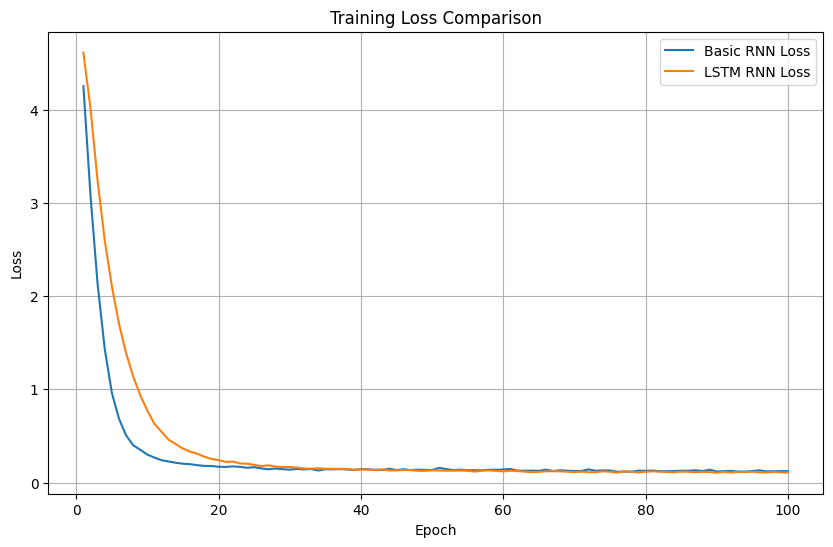

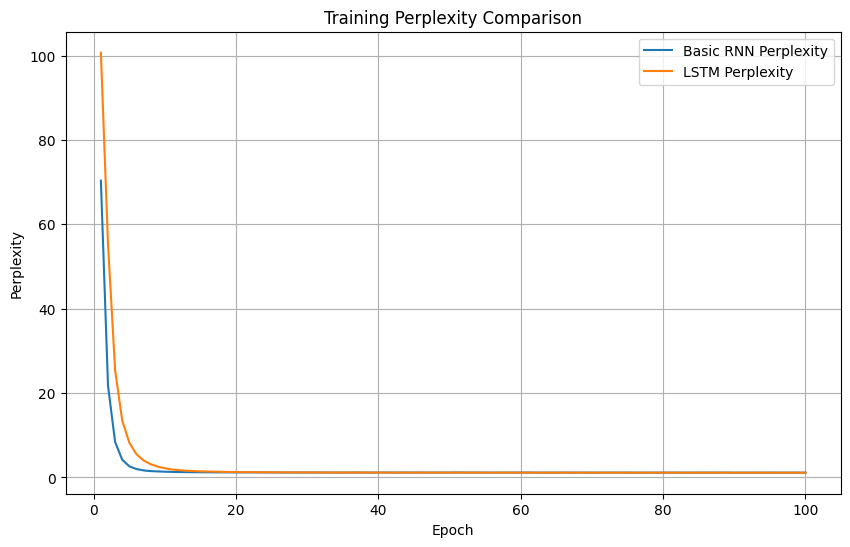

In [ ]:
import matplotlib.pyplot as plt

# Plotting Losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), rnn_loss, label='Basic RNN Loss')
plt.plot(range(1, epochs + 1), lstm_loss, label='LSTM RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Perplexities
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), rnn_perplexities, label='Basic RNN Perplexity')
plt.plot(range(1, epochs + 1), lstm_perplexities, label='LSTM Perplexity')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.title('Training Perplexity Comparison')
plt.legend()
plt.grid(True)
plt.show()

For the sake of making the comparison more obvious, we will try to switch to a larger, classic corpus for double check.

In [ ]:
import requests

url = "https://www.gutenberg.org/files/1661/1661-0.txt"
response = requests.get(url)
text = response.text

import re
# Split on sentence-ending punctuation
sentences = re.split(r'[.!?]+', text)
text_data = [s.strip() for s in sentences if len(s.strip()) > 20][:2500]
print(f"Number of sentences in text_data: {len(text_data)}")

Number of sentences in text_data: 2500


In [ ]:
tokenizer = get_tokenizer("basic_english")

def yield_tokens(data):
    for text in data:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(text_data),
                                  specials=["<unk>"], min_freq = 2)
vocab.set_default_index(vocab["<unk>"])

print(f"Vocabulary size: {len(vocab)}")

def text_to_sequence(text):
    return [vocab[token] for token in tokenizer(text)]

Vocabulary size: 2510


In [ ]:
seq_length = 10
batch_size = 32
epochs = 100
clip = 1.0
embedding_dim = 128
hidden_dim = 256
n_layers = 2
dropout = 0.3
lr = 0.001

dataset = TextDataset(text_data, seq_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(f"Number of sequences in dataset: {len(dataset)}")

Number of sequences in dataset: 22266


In [ ]:
rnn_model = BasicRNN(
    vocab_size=len(vocab), embedding_dim=embedding_dim, hidden_dim=hidden_dim,
    output_dim=len(vocab), n_layers=n_layers, dropout= dropout)
print(f"\nTraining Basic RNN: ")
rnn_loss, rnn_perplexities = train_and_evaluate(rnn_model, dataloader,
                                                epochs, lr, clip)


Training Basic RNN: 
Epoch: 1/100, Loss: 4.9361, Acc: 0.1607, Perplexity: 139.22
Epoch: 10/100, Loss: 2.9530, Acc: 0.3285, Perplexity: 19.16
Epoch: 20/100, Loss: 2.6244, Acc: 0.3863, Perplexity: 13.80
Epoch: 30/100, Loss: 2.4850, Acc: 0.4124, Perplexity: 12.00
Epoch: 40/100, Loss: 2.3964, Acc: 0.4314, Perplexity: 10.98
Epoch: 50/100, Loss: 2.3270, Acc: 0.4465, Perplexity: 10.25
Epoch: 60/100, Loss: 2.2793, Acc: 0.4563, Perplexity: 9.77
Epoch: 70/100, Loss: 2.2472, Acc: 0.4629, Perplexity: 9.46
Epoch: 80/100, Loss: 2.2237, Acc: 0.4676, Perplexity: 9.24
Epoch: 90/100, Loss: 2.1938, Acc: 0.4736, Perplexity: 8.97
Epoch: 100/100, Loss: 2.1793, Acc: 0.4779, Perplexity: 8.84


In [ ]:
lstm_model = LSTMRNN(
    vocab_size=len(vocab), embedding_dim=embedding_dim, hidden_dim=hidden_dim,
    output_dim=len(vocab), n_layers=n_layers, dropout = dropout
)
print(f"\nTraining LSTM:")
lstm_loss, lstm_perplexities = train_and_evaluate(lstm_model, dataloader,
                                                  epochs, lr, clip)


Training LSTM:
Epoch: 1/100, Loss: 5.2679, Acc: 0.1400, Perplexity: 194.01
Epoch: 10/100, Loss: 2.7772, Acc: 0.3624, Perplexity: 16.07
Epoch: 20/100, Loss: 2.1190, Acc: 0.4879, Perplexity: 8.32
Epoch: 30/100, Loss: 1.8093, Acc: 0.5532, Perplexity: 6.11
Epoch: 40/100, Loss: 1.6285, Acc: 0.5920, Perplexity: 5.10
Epoch: 50/100, Loss: 1.5074, Acc: 0.6197, Perplexity: 4.51
Epoch: 60/100, Loss: 1.4187, Acc: 0.6410, Perplexity: 4.13
Epoch: 70/100, Loss: 1.3498, Acc: 0.6572, Perplexity: 3.86
Epoch: 80/100, Loss: 1.3002, Acc: 0.6682, Perplexity: 3.67
Epoch: 90/100, Loss: 1.2499, Acc: 0.6803, Perplexity: 3.49
Epoch: 100/100, Loss: 1.2102, Acc: 0.6911, Perplexity: 3.35


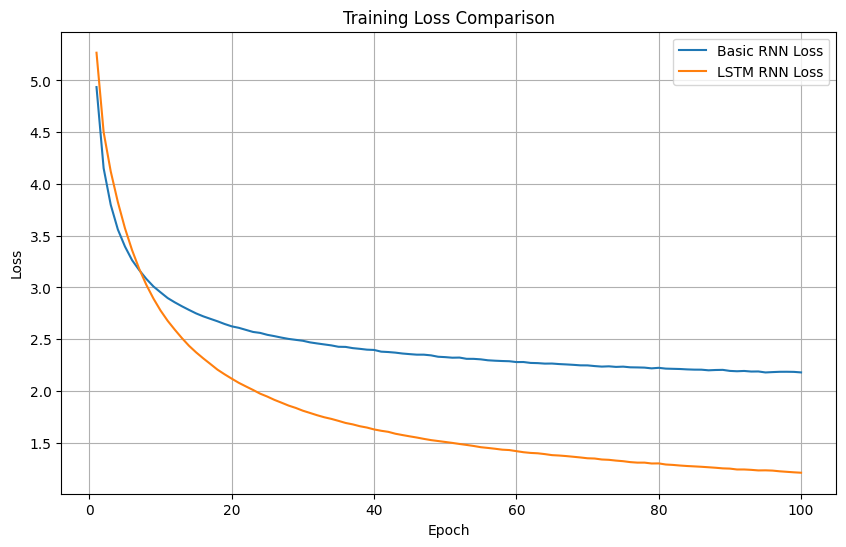

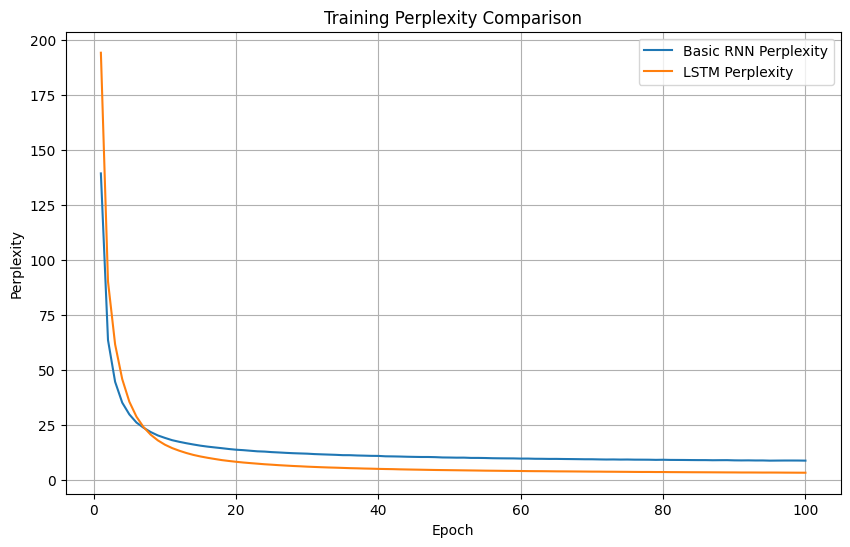

In [ ]:
import matplotlib.pyplot as plt

# Plotting Losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), rnn_loss, label='Basic RNN Loss')
plt.plot(range(1, epochs + 1), lstm_loss, label='LSTM RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Perplexities
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), rnn_perplexities, label='Basic RNN Perplexity')
plt.plot(range(1, epochs + 1), lstm_perplexities, label='LSTM Perplexity')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.title('Training Perplexity Comparison')
plt.legend()
plt.grid(True)
plt.show()

Now the difference between two models is obvious.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model.load_state_dict(torch.load('best_BasicRNN.pt'))
lstm_model.load_state_dict(torch.load('best_LSTMRNN.pt'))

seed_text = "I am"

In [ ]:
print(f"\nGenerating text with Basic RNN (Seed: '{seed_text}'):")
rnn_generated = generate_text(rnn_model, seed_text, seq_length,
                              vocab, num_words=100)
print(rnn_generated)


Generating text with Basic RNN (Seed: 'I am'):
I am to <unk> at the neck with a other opened women and into some <unk> , <unk> evil , which is a most useful material so simple as copying at the end of the time , but i could not be bought a <unk> <unk> and <unk> his immense <unk> with a great blue , as a rule , bald enough to call upon my work , and , both in the morning , and did not want i give my business came to me instead of the more than there are six of us the <unk> of the typewriter he


In [ ]:
print(f"\nGenerating text with LSTM (Seed: '{seed_text}'):")
lstm_generated = generate_text(lstm_model, seed_text, seq_length,
                               vocab, num_words=100)
print(lstm_generated)


Generating text with LSTM (Seed: 'I am'):
I am a <unk> only not <unk> to think of the <unk> , who is an <unk> living on the ground floor , and i asked him if he could tell me what had become of the <unk> murder and the <unk> <unk> , he has been more nearly correct than the official <unk> of this new case , and why i <unk> young openshaw to have the vacancy after all but after thinking it over for a few minutes he said that it would be all right to have a family <unk> like this <unk> abroad , and his mind was


And from the generated text, we can see that **LSTM** is outperforming too, which gives us a more explicit comparison and an expected outcome.

# ----------------------------------------------------------------------------------

### Seq2Seq Machine Translation with Attention


#### Objectives
Implement a sequence-to-sequence model with attention for machine translation between two languages (e.g., English to French). This task will help you understand conditioned generation in the context of sequence translation, leveraging the power of LSTMs and attention mechanisms.

### 1. Model Architecture (10 Points)
- Build a Seq2Seq model consisting of an encoder and a decoder, both utilizing LSTM layers to effectively capture temporal dependencies in the input and target sequences.
- Incorporate an attention mechanism between the encoder and decoder to enhance the model's ability to focus on relevant parts of the input sequence during translation, as discussed in the **Attention Mechanisms** section of the lectures.

In [2]:
class Encoder(nn.Module):
  def __init__(self, input_dim, embedding_dim, hidden_dim, n_layers, dropout):
    super(Encoder, self).__init__()
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    # Embedding layers to convert input tokens to dense vectors
    self.embedding = nn.Embedding(input_dim, embedding_dim)
    # LSTM layer for encoding the sequence
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                        batch_first = True,
                        dropout = dropout if n_layers > 1 else 0)
    self.dropout = nn.Dropout(dropout)

  def forward(self, src):
    embedded = self.dropout(self.embedding(src))
    outputs, (hidden, cell) = self.lstm(embedded)

    return outputs, hidden, cell

In [3]:
class Attention(nn.Module):
  def __init__(self, hidden_dim):
    super(Attention, self).__init__()
    self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
    self.v = nn.Parameter(torch.rand(hidden_dim))
    stdv = 1. / np.sqrt(hidden_dim)
    self.v.data.uniform_(-stdv, stdv)

  def forward(self, hidden, encoder_outputs):
    src_len = encoder_outputs.shape[1]
    hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)

    score = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim = 2)))
    attention = torch.sum(self.v * score, dim = 2)

    return torch.softmax(attention, dim = 1)

In [4]:
class Decoder(nn.Module):
  def __init__(self, output_dim, embedding_dim, hidden_dim, n_layers, dropout):
    super(Decoder, self).__init__()
    self.output_dim = output_dim
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    self.embedding = nn.Embedding(output_dim, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim + hidden_dim, hidden_dim, n_layers,
                        batch_first = True,
                        dropout = dropout if n_layers > 1 else 0)
    self.fc = nn.Linear(hidden_dim, output_dim)
    self.dropout = nn.Dropout(dropout)
    self.attention = Attention(hidden_dim)

  def forward(self, target, hidden, cell, encoder_outputs):
    embedded = self.dropout(self.embedding(target))

    attn_weights = self.attention(hidden[-1], encoder_outputs)
    attn_weights = attn_weights.unsqueeze(1)

    context = torch.bmm(attn_weights, encoder_outputs)

    lstm_input = torch.cat((embedded, context), dim = 2)

    output, (hidden, cell) = self.lstm(lstm_input, (hidden, cell))

    prediction = self.fc(output.squeeze(1))

    return prediction, hidden, cell, attn_weights


In [5]:
class Seq2Seq(nn.Module):
  def __init__(self, encoder, decoder, device):
    super(Seq2Seq, self).__init__()
    self.encoder = encoder
    self.decoder = decoder
    self.device = device

  def forward(self, src, trg, teacher_forcing_ratio = 0.5):
    batch_size = src.shape[0]
    trg_len = trg.shape[1]
    trg_vocab_size = self.decoder.output_dim

    outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device)

    encoder_outputs, hidden, cell = self.encoder(src)

    input = trg[:,0].unsqueeze(1)

    for t in range(1, trg_len):
      output, hidden, cell, _ = self.decoder(input, hidden, cell,
                                             encoder_outputs)
      outputs[:, t, :] = output

      teacher_force = random.random() < teacher_forcing_ratio
      top1 = output.argmax(1).unsqueeze(1)
      input = trg[:, t].unsqueeze(1) if teacher_force else top1

    return outputs

### 2. Data Preparation and Preprocessing (10 Points)
- Select a bilingual corpus as your dataset (e.g., a collection of English-French sentence pairs). Perform necessary preprocessing steps, including tokenization, converting text into sequences of integers, and padding sequences to ensure uniform length.

For the selection of dataset, we obtain it from: `https://www.euromatrixplus.net/multi-un/`

In [6]:
import random
import tarfile

tgz_path = "/content/drive/MyDrive/training-parallel-un.tgz"

with tarfile.open(tgz_path, 'r:gz') as tar:
    fr_file = tar.extractfile('un/undoc.2000.fr-en.fr')
    fr_lines = fr_file.read().decode('utf-8').split('\n')

    en_file = tar.extractfile('un/undoc.2000.fr-en.en')
    en_lines = en_file.read().decode('utf-8').split('\n')

data = [(src, trg) for src, trg
        in zip(fr_lines, en_lines) if src.strip() and trg.strip()][:1000]
src_sentences, trg_sentences = zip(*data)
print(f"Number of sentence pairs: {len(src_sentences)}")
print(f"Sample pair: {src_sentences[0]} -> {trg_sentences[0]}")

Number of sentence pairs: 1000
Sample pair: Nations Unies -> United Nations


In [7]:
train_data = data[:-10]
test_data = data[-10:]
train_src_sentences, train_trg_sentences = zip(*train_data)
test_src_sentences, test_trg_sentences = zip(*test_data)

In [8]:
!python -m spacy download fr_core_news_sm

src_tokenizer = get_tokenizer("spacy", language="fr_core_news_sm")
trg_tokenizer = get_tokenizer("basic_english")

def yield_tokens(sentences, tokenizer):
    for sent in sentences:
        yield tokenizer(sent)

src_vocab = build_vocab_from_iterator(yield_tokens(train_src_sentences,
                                                   src_tokenizer),
                                      specials=["<pad>", "<sos>",
                                                "<eos>", "<unk>"],
                                      min_freq=2)
trg_vocab = build_vocab_from_iterator(yield_tokens(train_trg_sentences,
                                                   trg_tokenizer),
                                      specials=["<pad>", "<sos>",
                                                "<eos>", "<unk>"],
                                      min_freq=2)
src_vocab.set_default_index(src_vocab["<unk>"])
trg_vocab.set_default_index(trg_vocab["<unk>"])
print(f"Source (French) vocab size: {len(src_vocab)}")
print(f"Target (English) vocab size: {len(trg_vocab)}")

def text_to_sequence(text, vocab, tokenizer, max_len):
    tokens = tokenizer(text.lower())
    seq = [vocab["<sos>"]] + [vocab.get(token, vocab["<unk>"]) for token
                              in tokens][:max_len-2] + [vocab["<eos>"]]
    return seq + [vocab["<pad>"]] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Source (French) vocab size: 2127
Target (English) vocab size: 1892


In [9]:
def text_to_sequence(text, vocab, tokenizer, max_len):
    tokens = tokenizer(text.lower())
    seq = [vocab["<sos>"]] + [vocab[token] for token in tokens][:max_len-2] + [vocab["<eos>"]]
    return seq + [vocab["<pad>"]] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len]

In [10]:
class TranslationDataset(Dataset):
    def __init__(self, src_sentences, trg_sentences,
                 src_vocab, trg_vocab, max_len=20):
        self.src_data = []
        self.trg_data = []

        for src, trg in zip(src_sentences, trg_sentences):
            src_seq = text_to_sequence(src, src_vocab, src_tokenizer, max_len)
            trg_seq = text_to_sequence(trg, trg_vocab, trg_tokenizer, max_len)
            self.src_data.append(src_seq)
            self.trg_data.append(trg_seq)

    def __len__(self):
        return len(self.src_data)

    def __getitem__(self, idx):
        return torch.tensor(self.src_data[idx]), torch.tensor(self.trg_data[idx])

In [14]:
dataset = TranslationDataset(train_src_sentences, train_trg_sentences,
                             src_vocab, trg_vocab)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
print(f"Number of sequences in dataset: {len(dataset)}")

Number of sequences in dataset: 990


### 3. Training (10 Points)
- Train your Seq2Seq model on the preprocessed dataset, aiming to minimize the difference between the decoder's predicted translation and the actual target sentence. Experiment with different hyperparameters, such as the number of LSTM units, learning rate, and batch size, to optimize your model's performance.

In [11]:
def train(model, dataloader, epochs, lr, clip=1.0):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=src_vocab["<pad>"])
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for src, trg in dataloader:
            src, trg = src.to(device), trg.to(device)

            optimizer.zero_grad()
            output = model(src, trg)

            output = output[:, 1:, :].contiguous().view(-1, output.shape[-1])
            trg = trg[:, 1:].contiguous().view(-1)
            loss = criterion(output, trg)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

In [12]:
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = Encoder(len(src_vocab), 256, 512, 2, 0.5)
decoder = Decoder(len(trg_vocab), 256, 512, 2, 0.5)
model = Seq2Seq(encoder, decoder, device).to(device)

In [15]:
train(model, dataloader, 20, 0.001)

Epoch 1/20, Loss: 6.0222
Epoch 2/20, Loss: 5.5075
Epoch 3/20, Loss: 5.3973
Epoch 4/20, Loss: 5.3448
Epoch 5/20, Loss: 5.3015
Epoch 6/20, Loss: 5.2641
Epoch 7/20, Loss: 5.2208
Epoch 8/20, Loss: 5.1823
Epoch 9/20, Loss: 5.1439
Epoch 10/20, Loss: 5.1070
Epoch 11/20, Loss: 5.0709
Epoch 12/20, Loss: 5.0254
Epoch 13/20, Loss: 4.9828
Epoch 14/20, Loss: 4.9365
Epoch 15/20, Loss: 4.9064
Epoch 16/20, Loss: 4.8811
Epoch 17/20, Loss: 4.8173
Epoch 18/20, Loss: 4.8063
Epoch 19/20, Loss: 4.7446
Epoch 20/20, Loss: 4.7121


### 4. Translation and Evaluation (10 Points)
- Use your trained model to translate a set of sentences from the source language to the target language. Evaluate translation quality using an appropriate metric, such as the BLEU (Bilingual Evaluation Understudy) score, to quantitatively assess how your translations compare to reference translations.

In [16]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def translate_sentence(model, sentence, src_vocab, trg_vocab,
                       src_tokenizer, max_len=20):
    model.eval()
    tokens = text_to_sequence(sentence, src_vocab, src_tokenizer, max_len)
    src_tensor = torch.tensor(tokens).unsqueeze(0).to(device)

    with torch.no_grad():
        encoder_outputs, hidden, cell = model.encoder(src_tensor)
        trg_input = torch.tensor([[trg_vocab["<sos>"]]]).to(device)
        outputs = []

        for _ in range(max_len):
            output, hidden, cell, _ = model.decoder(trg_input, hidden,
                                                    cell, encoder_outputs)
            pred_token = output.argmax(1).item()
            if pred_token == trg_vocab["<eos>"]:
                break
            outputs.append(pred_token)
            trg_input = torch.tensor([[pred_token]]).to(device)

        return " ".join(trg_vocab.lookup_token(idx) for idx in outputs)

In [17]:
# French test sentences
test_sentences = test_src_sentences
# English reference translations
reference_translations = test_trg_sentences
predicted_translations = []

print("\nTranslations and BLEU Scores:")
# Smoothing for short sentences
smoothie = SmoothingFunction().method1
for src, ref in zip(test_sentences, reference_translations):
    pred = translate_sentence(model, src, src_vocab, trg_vocab, src_tokenizer)
    predicted_translations.append(pred)

    # Tokenize reference and prediction for BLEU
    ref_tokens = trg_tokenizer(ref.lower())
    pred_tokens = pred.split()

    # Compute BLEU score
    bleu_score = sentence_bleu([ref_tokens], pred_tokens,
                               smoothing_function=smoothie)

    print(f"Source (French): {src}")
    print(f"Reference (English): {ref}")
    print(f"Predicted (English): {pred}")
    print(f"BLEU Score: {bleu_score:.4f}\n")


Translations and BLEU Scores:
Source (French): Il faut élaborer les politiques et les mesures d'amélioration du transport intermodal en tenant compte des approches modales pour s'assurer qu'elles ciblent bien les entraves existantes et visent à la bonne qualité des liaisons.
Reference (English): Intermodal transport policies and improvements need to be developed co-operatively with modal approaches to ensure that they are targeted at existing impediments and aimed at getting the linkages right.
Predicted (English): the <unk> of the <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
BLEU Score: 0.0055

Source (French): La probabilité de succès d'une politique de transport intermodal dépend de la relation entre les unités chargées de la politique de transport intermodal (ou autres structures politiques), les organes consultatifs de l'industrie et les autres acteurs.
Reference (English): The likelihood of intermodal transport policy being successful depen

In [18]:
average_bleu = np.mean([sentence_bleu([trg_tokenizer(ref.lower())], pred.split(), smoothing_function=smoothie)
                        for ref, pred in zip(reference_translations, predicted_translations)])
print(f"Average BLEU Score across test set: {average_bleu:.4f}")

Average BLEU Score across test set: 0.0091


Since we can see that our vanilla model doesn't perform that well, with a low BLEU Score and quite a few 'the' and '\<unk\>' thrown from the translation.

we want to see whether adjusting hyperparameters, e.g. **dataset size, vocabulary, epochs, beam search,** etc. would help enhancing the performance.

In [20]:
# Increase from 1000 to 3000
data = [(src, trg) for src, trg
        in zip(fr_lines, en_lines) if src.strip() and trg.strip()][:3000]
src_sentences, trg_sentences = zip(*data)

train_data = data[:-10]
test_data = data[-10:]
train_src_sentences, train_trg_sentences = zip(*train_data)
test_src_sentences, test_trg_sentences = zip(*test_data)

# Lowered min_freq
src_vocab = build_vocab_from_iterator(yield_tokens(train_src_sentences, src_tokenizer),
                                      specials=["<pad>", "<sos>", "<eos>", "<unk>"],
                                      min_freq=1)
trg_vocab = build_vocab_from_iterator(yield_tokens(train_trg_sentences, trg_tokenizer),
                                      specials=["<pad>", "<sos>", "<eos>", "<unk>"],
                                      min_freq=1)
src_vocab.set_default_index(src_vocab["<unk>"])
trg_vocab.set_default_index(trg_vocab["<unk>"])

dataset = TranslationDataset(train_src_sentences, train_trg_sentences, src_vocab, trg_vocab)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = Encoder(len(src_vocab), 256, 512, 2, 0.5)
decoder = Decoder(len(trg_vocab), 256, 512, 2, 0.5)
model = Seq2Seq(encoder, decoder, device).to(device)

# Increased epochs
train(model, dataloader, 50, 0.001)

Epoch 1/50, Loss: 6.4410
Epoch 2/50, Loss: 5.9605
Epoch 3/50, Loss: 5.8645
Epoch 4/50, Loss: 5.7808
Epoch 5/50, Loss: 5.6878
Epoch 6/50, Loss: 5.6065
Epoch 7/50, Loss: 5.5134
Epoch 8/50, Loss: 5.4254
Epoch 9/50, Loss: 5.3177
Epoch 10/50, Loss: 5.2153
Epoch 11/50, Loss: 5.1091
Epoch 12/50, Loss: 5.0207
Epoch 13/50, Loss: 4.8965
Epoch 14/50, Loss: 4.7934
Epoch 15/50, Loss: 4.7084
Epoch 16/50, Loss: 4.5913
Epoch 17/50, Loss: 4.4951
Epoch 18/50, Loss: 4.3804
Epoch 19/50, Loss: 4.2695
Epoch 20/50, Loss: 4.1703
Epoch 21/50, Loss: 4.1051
Epoch 22/50, Loss: 4.0194
Epoch 23/50, Loss: 3.9241
Epoch 24/50, Loss: 3.8184
Epoch 25/50, Loss: 3.7687
Epoch 26/50, Loss: 3.6524
Epoch 27/50, Loss: 3.5899
Epoch 28/50, Loss: 3.5058
Epoch 29/50, Loss: 3.3957
Epoch 30/50, Loss: 3.2870
Epoch 31/50, Loss: 3.2604
Epoch 32/50, Loss: 3.1630
Epoch 33/50, Loss: 3.1429
Epoch 34/50, Loss: 3.0253
Epoch 35/50, Loss: 2.9916
Epoch 36/50, Loss: 2.8806
Epoch 37/50, Loss: 2.8009
Epoch 38/50, Loss: 2.7416
Epoch 39/50, Loss: 2.

In [21]:
# Inference with Beam Search
def translate_sentence(model, sentence, src_vocab, trg_vocab, src_tokenizer,
                       max_len=20, beam_width=3):
    model.eval()
    tokens = text_to_sequence(sentence, src_vocab, src_tokenizer, max_len)
    src_tensor = torch.tensor(tokens,
                              dtype=torch.long).unsqueeze(0).to(device)

    with torch.no_grad():
        encoder_outputs, hidden, cell = model.encoder(src_tensor)
        trg_input = torch.tensor([[trg_vocab["<sos>"]]],
                                 dtype=torch.long).to(device)

        # Beam search initialization
        # (score, sequence, hidden, cell)
        beams = [(0.0, [trg_vocab["<sos>"]], hidden, cell)]

        for _ in range(max_len):
            new_beams = []
            for score, seq, h, c in beams:
                if seq[-1] == trg_vocab["<eos>"]:
                    new_beams.append((score, seq, h, c))
                    continue
                trg_tensor = torch.tensor([[seq[-1]]],
                                          dtype=torch.long).to(device)
                output, h, c, _ = model.decoder(trg_tensor, h,
                                                c, encoder_outputs)
                probs = torch.softmax(output, dim=1).squeeze(0)
                top_probs, top_indices = probs.topk(beam_width)

                for prob, idx in zip(top_probs, top_indices):
                    new_score = score + torch.log(prob).item()
                    new_seq = seq + [idx.item()]
                    new_beams.append((new_score, new_seq,
                                      h.clone(), c.clone()))

            beams = sorted(new_beams, key=lambda x: x[0],
                           reverse=True)[:beam_width]
            if all(b[1][-1] == trg_vocab["<eos>"] for b in beams):
                break

        best_score, best_seq, _, _ = beams[0]
        return " ".join(trg_vocab.lookup_token(idx) for idx in best_seq[1:])

In [22]:
test_sentences = test_src_sentences
reference_translations = test_trg_sentences
predicted_translations = []

print("\nTranslations and BLEU Scores:")
smoothie = SmoothingFunction().method1
for src, ref in zip(test_sentences, reference_translations):
    pred = translate_sentence(model, src, src_vocab, trg_vocab, src_tokenizer)
    predicted_translations.append(pred)

    ref_tokens = trg_tokenizer(ref.lower())
    pred_tokens = pred.split()

    bleu_score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)

    print(f"Source (French): {src}")
    print(f"Reference (English): {ref}")
    print(f"Predicted (English): {pred}")
    print(f"BLEU Score: {bleu_score:.4f}\n")

average_bleu = np.mean([sentence_bleu([trg_tokenizer(ref.lower())], pred.split(), smoothing_function=smoothie)
                        for ref, pred in zip(reference_translations, predicted_translations)])
print(f"Average BLEU Score across test set: {average_bleu:.4f}")


Translations and BLEU Scores:
Source (French): Rapports du Corps commun d'inspection
Reference (English): Reports of the Joint Inspection Unit
Predicted (English): reports of the office of germany <eos>
BLEU Score: 0.1635

Source (French): Le Président du Corps commun d'inspection, M. Louis-Dominique Ouedraogo (Burkina Faso), présente le rapport du Corps commun d'inspection (A/55/34) et le programme du Corps pour 2000 et la liste préliminaire des questions pouvant faire l'objet de rapports en 2001 et au-delà (A/54/ 960).
Reference (English): The Chairman of the Joint Inspection Unit, Mr. Louis-Dominique Ouedraogo (Burkina Faso), introduced the annual report of the Unit (A/55/34) and on the work programme of the Joint Inspection Unit for 2000 and the preliminary listing of potential reports for 2001 and beyond (A/54/960).
Predicted (English): the briefing to group of 77 ambassadors of the united nations high commissioner for the ministry of the <eos>
BLEU Score: 0.0057

Source (French)

Yet still, it is not ideal to be used as a translator. However, we could see a high improvement compared with the previous version.

- *The speed of loss deduction is faster.*

- *The translation effect is much better.*

The credit should be given to the adjustments of these hyperparameters.

### 5. Analysis (10 Points)
- Discuss the impact of the attention mechanism on translation quality. Compare your model's performance with and without attention using both qualitative examples and quantitative metrics. Reflect on how different architectural choices and hyperparameters influenced the outcomes.

We've seen the difference that's brought by **hyperparameters** above.

Now let's see the difference caused by **attention**.

In [24]:
class DecoderNoAttention(nn.Module):
    def __init__(self, output_dim, embedding_dim,
                 hidden_dim, n_layers, dropout):
        super(DecoderNoAttention, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            batch_first=True,
                            dropout=dropout if n_layers > 1 else 0)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, target, hidden, cell, encoder_outputs=None):
        embedded = self.dropout(self.embedding(target))
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        prediction = self.fc(output.squeeze(1))
        return prediction, hidden, cell, None

In [25]:
encoder_no_attn = Encoder(len(src_vocab), 256, 512, 2, 0.5)
decoder_no_attn = DecoderNoAttention(len(trg_vocab), 256, 512, 2, 0.5)
model_no_attn = Seq2Seq(encoder_no_attn, decoder_no_attn, device).to(device)
print("\nTraining Model without Attention:")
train(model_no_attn, dataloader, 20, 0.001)


Training Model without Attention:
Epoch 1/20, Loss: 6.4630
Epoch 2/20, Loss: 5.9410
Epoch 3/20, Loss: 5.8189
Epoch 4/20, Loss: 5.7175
Epoch 5/20, Loss: 5.6281
Epoch 6/20, Loss: 5.5266
Epoch 7/20, Loss: 5.4367
Epoch 8/20, Loss: 5.3557
Epoch 9/20, Loss: 5.2873
Epoch 10/20, Loss: 5.1864
Epoch 11/20, Loss: 5.1273
Epoch 12/20, Loss: 5.0113
Epoch 13/20, Loss: 4.9327
Epoch 14/20, Loss: 4.8345
Epoch 15/20, Loss: 4.7505
Epoch 16/20, Loss: 4.6195
Epoch 17/20, Loss: 4.5690
Epoch 18/20, Loss: 4.4798
Epoch 19/20, Loss: 4.4118
Epoch 20/20, Loss: 4.3285


In [26]:
encoder_attn = Encoder(len(src_vocab), 256, 512, 2, 0.5)
decoder_attn = Decoder(len(trg_vocab), 256, 512, 2, 0.5)
model_attn = Seq2Seq(encoder_attn, decoder_attn, device).to(device)
print("\nTraining Model with Attention:")
train(model_attn, dataloader, 20, 0.001)


Training Model with Attention:
Epoch 1/20, Loss: 6.4456
Epoch 2/20, Loss: 5.9562
Epoch 3/20, Loss: 5.8576
Epoch 4/20, Loss: 5.7720
Epoch 5/20, Loss: 5.6822
Epoch 6/20, Loss: 5.5853
Epoch 7/20, Loss: 5.4857
Epoch 8/20, Loss: 5.4028
Epoch 9/20, Loss: 5.2964
Epoch 10/20, Loss: 5.2060
Epoch 11/20, Loss: 5.1052
Epoch 12/20, Loss: 4.9744
Epoch 13/20, Loss: 4.8647
Epoch 14/20, Loss: 4.7678
Epoch 15/20, Loss: 4.6467
Epoch 16/20, Loss: 4.5534
Epoch 17/20, Loss: 4.4372
Epoch 18/20, Loss: 4.3474
Epoch 19/20, Loss: 4.2686
Epoch 20/20, Loss: 4.1404


Accidently forgot to let the training function return the loss values iteratively. Manual input is used for visualization based on the outputs above.

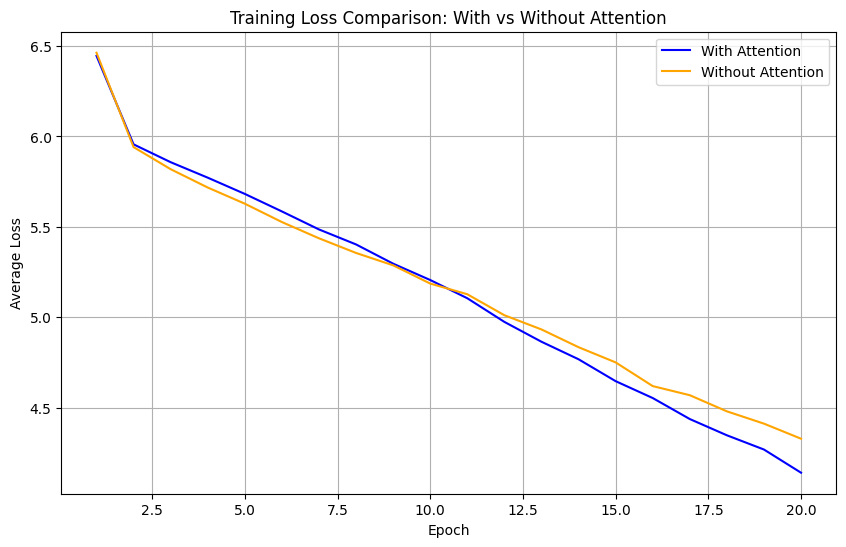

In [30]:
import matplotlib.pyplot as plt

# Loss values from your output
losses_attn = [
    6.4456, 5.9562, 5.8576, 5.7720, 5.6822, 5.5853, 5.4857, 5.4028, 5.2964, 5.2060,
    5.1052, 4.9744, 4.8647, 4.7678, 4.6467, 4.5534, 4.4372, 4.3474, 4.2686, 4.1404
]
losses_no_attn = [
    6.4630, 5.9410, 5.8189, 5.7175, 5.6281, 5.5266, 5.4367, 5.3557, 5.2873, 5.1864,
    5.1273, 5.0113, 4.9327, 4.8345, 4.7505, 4.6195, 4.5690, 4.4798, 4.4118, 4.3285
]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), losses_attn, label='With Attention', color='blue')
plt.plot(range(1, 21), losses_no_attn, label='Without Attention', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Comparison: With vs Without Attention')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print("\nTranslations without Attention:")
translations_no_attn = []
for src, ref in zip(test_sentences, reference_translations):
    pred = translate_sentence(model_no_attn, src, src_vocab, trg_vocab, src_tokenizer)
    translations_no_attn.append(pred)
    ref_tokens = trg_tokenizer(ref.lower())
    pred_tokens = pred.split()
    bleu_score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
    print(f"Source (French): {src}")
    print(f"Reference (English): {ref}")
    print(f"Predicted (English): {pred}")
    print(f"BLEU Score: {bleu_score:.4f}\n")


Translations without Attention:
Source (French): Rapports du Corps commun d'inspection
Reference (English): Reports of the Joint Inspection Unit
Predicted (English): the of of the <eos>
BLEU Score: 0.0930

Source (French): Le Président du Corps commun d'inspection, M. Louis-Dominique Ouedraogo (Burkina Faso), présente le rapport du Corps commun d'inspection (A/55/34) et le programme du Corps pour 2000 et la liste préliminaire des questions pouvant faire l'objet de rapports en 2001 et au-delà (A/54/ 960).
Reference (English): The Chairman of the Joint Inspection Unit, Mr. Louis-Dominique Ouedraogo (Burkina Faso), introduced the annual report of the Unit (A/55/34) and on the work programme of the Joint Inspection Unit for 2000 and the preliminary listing of potential reports for 2001 and beyond (A/54/960).
Predicted (English): the committee decided , by acclamation , the general assembly , the general assembly appoint mr . <eos>
BLEU Score: 0.0042

Source (French): Des déclarations sont

In [28]:
print("\nTranslations with Attention:")
translations_attn = []
smoothie = SmoothingFunction().method1
for src, ref in zip(test_sentences, reference_translations):
    pred = translate_sentence(model_attn, src, src_vocab, trg_vocab, src_tokenizer)
    translations_attn.append(pred)
    ref_tokens = trg_tokenizer(ref.lower())
    pred_tokens = pred.split()
    bleu_score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
    print(f"Source (French): {src}")
    print(f"Reference (English): {ref}")
    print(f"Predicted (English): {pred}")
    print(f"BLEU Score: {bleu_score:.4f}\n")


Translations with Attention:
Source (French): Rapports du Corps commun d'inspection
Reference (English): Reports of the Joint Inspection Unit
Predicted (English): conclusion of the office of the <eos>
BLEU Score: 0.0699

Source (French): Le Président du Corps commun d'inspection, M. Louis-Dominique Ouedraogo (Burkina Faso), présente le rapport du Corps commun d'inspection (A/55/34) et le programme du Corps pour 2000 et la liste préliminaire des questions pouvant faire l'objet de rapports en 2001 et au-delà (A/54/ 960).
Reference (English): The Chairman of the Joint Inspection Unit, Mr. Louis-Dominique Ouedraogo (Burkina Faso), introduced the annual report of the Unit (A/55/34) and on the work programme of the Joint Inspection Unit for 2000 and the preliminary listing of potential reports for 2001 and beyond (A/54/960).
Predicted (English): the committee decided , by acclamation , the , the , , , , , , , the <eos>
BLEU Score: 0.0025

Source (French): Des déclarations sont faites par le

In [29]:
avg_bleu_attn = np.mean([sentence_bleu([trg_tokenizer(ref.lower())], pred.split(), smoothing_function=smoothie)
                         for ref, pred in zip(reference_translations, translations_attn)])
avg_bleu_no_attn = np.mean([sentence_bleu([trg_tokenizer(ref.lower())], pred.split(), smoothing_function=smoothie)
                            for ref, pred in zip(reference_translations, translations_no_attn)])
print(f"Average BLEU Score with Attention: {avg_bleu_attn:.4f}")
print(f"Average BLEU Score without Attention: {avg_bleu_no_attn:.4f}")

Average BLEU Score with Attention: 0.0891
Average BLEU Score without Attention: 0.0750


If we have to say something, the attention contained model seems to **perform slightly better** than the one without attention. From both the training result, and the BLEU score, both shows that **model with attention does a slightly better job**.

However, without **adequate data loaded and iterations**, which is due to the computational limitations, the little portion of training data cannot really make the result representative and convincing.